<a href="https://colab.research.google.com/github/SakshamSaini1001/AspireNex/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyngrok streamlit yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
import streamlit as st
from datetime import date
import yfinance as yf
from pyngrok import ngrok
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [3]:
start = st.date_input('Start',value = pd.to_datetime('2021-01-01'))
end =   st.date_input('End',value = pd.to_datetime('today'))
#date.today().strftime("%Y-%m-%d")

2024-07-18 10:29:21.354 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [4]:
stock_symbol = 'GAIL.NS'
user_input= st.text_input('enter stock ticker','AAPL')
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

2024-07-18 10:29:21.367 Session state does not function when running a script without `streamlit run`
[*********************100%%**********************]  1 of 1 completed


In [5]:
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
   x_train.append(scaled_data[x-prediction_days:x, 0])
   y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
from keras.layers import Dense, Dropout, LSTM

from keras.models import Sequential


model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout (0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout (0.2))

model.add(LSTM(units=50))

model.add(Dropout (0.2))

model.add(Dense (units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs = 25, batch_size=32)

Epoch 1/25
37/37 [==============================] - 14s 140ms/step - loss: 0.0170
Epoch 2/25
37/37 [==============================] - 4s 113ms/step - loss: 0.0029
Epoch 3/25
37/37 [==============================] - 5s 141ms/step - loss: 0.0025
Epoch 4/25
37/37 [==============================] - 4s 101ms/step - loss: 0.0021
Epoch 5/25
37/37 [==============================] - 3s 80ms/step - loss: 0.0022
Epoch 6/25
37/37 [==============================] - 3s 80ms/step - loss: 0.0022
Epoch 7/25
37/37 [==============================] - 4s 117ms/step - loss: 0.0019
Epoch 8/25
37/37 [==============================] - 3s 80ms/step - loss: 0.0019
Epoch 9/25
37/37 [==============================] - 3s 79ms/step - loss: 0.0020
Epoch 10/25
37/37 [==============================] - 3s 80ms/step - loss: 0.0019
Epoch 11/25
37/37 [==============================] - 4s 115ms/step - loss: 0.0019
Epoch 12/25
37/37 [==============================] - 3s 79ms/step - loss: 0.0020
Epoch 13/25
37/37 [===========

In [7]:
model.save('kerasmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
test_start= dt.datetime (2020,1,1)
test_end = dt.datetime.now()
def load_data(ticker):

  test_data = yf.download (ticker, test_start, test_end)
  data.reset_index(inplace=True)

  return data

data_load_state = st.text("Load data...")

test_data = load_data(user_input)

data_load_state.text("Loading data...done!")
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)


model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
   x_test.append(model_inputs [x-prediction_days:x, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)


[*********************100%%**********************]  1 of 1 completed


39/39 [==============================] - 2s 24ms/step


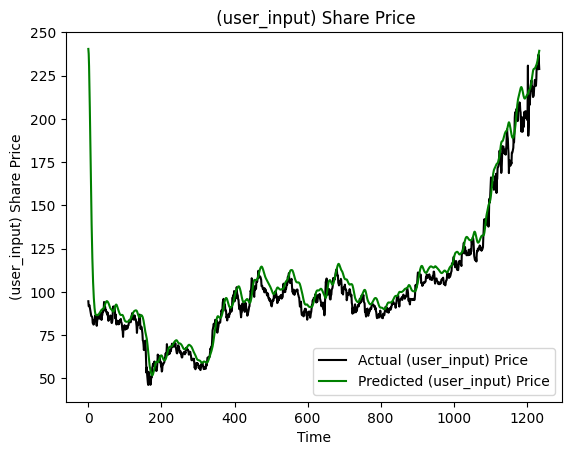

In [9]:
plt.plot(actual_prices, color="black", label="Actual (user_input) Price")

plt.plot(predicted_prices, color='green', label="Predicted (user_input) Price")
plt.title(" (user_input) Share Price")

plt.xlabel('Time')

plt.ylabel('(user_input) Share Price')
plt.legend()

plt.show()